In [1]:
# SENTIMENT ANALYSIS
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to C:\Users\Jaishree
[nltk_data]     Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jaishree
[nltk_data]     Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jaishree
[nltk_data]     Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Load dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('D:/Datasets/twitter_tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
print(df.head())

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [15]:
#TEXT CLEANING
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
print(df['cleaned_text'])

0             awww thats a bummer  you shoulda got david ...
1          is upset that he cant update his facebook by t...
2           i dived many times for the ball managed to sa...
3            my whole body feels itchy and like its on fire 
4           no its not behaving at all im mad why am i he...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999                                           happy     
Name: cleaned_text, Length: 1600000, dtype: object


In [8]:
#REMOVE STOP WORDS AND LEMMATIZATION
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['cleaned_text'].apply(preprocess_text)
print(df['processed_text'])

0          awww thats bummer shoulda got david carr third...
1          upset cant update facebook texting might cry r...
2          dived many time ball managed save 50 rest go b...
3                            whole body feel itchy like fire
4                                   behaving im mad cant see
                                 ...                        
1599995                        woke school best feeling ever
1599996             thewdbcom cool hear old walt interview â
1599997                       ready mojo makeover ask detail
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999                                                happy
Name: processed_text, Length: 1600000, dtype: object


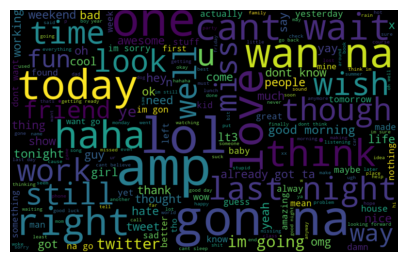

In [11]:
#world cloud
all_words = ' '.join([text for text in df['processed_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


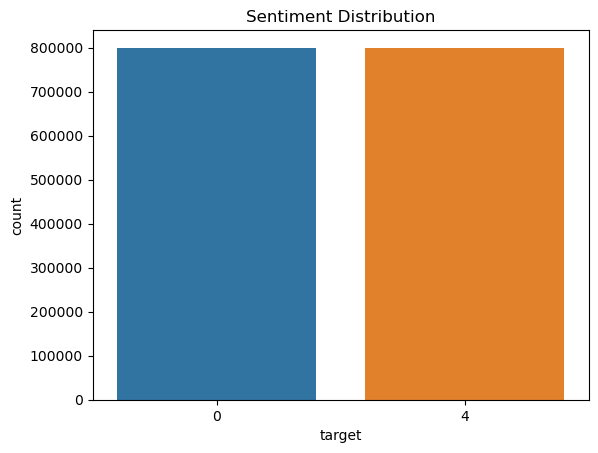

In [12]:
#distribution of sentiments
sns.countplot(df['target'])
plt.title('Sentiment Distribution')
plt.show()


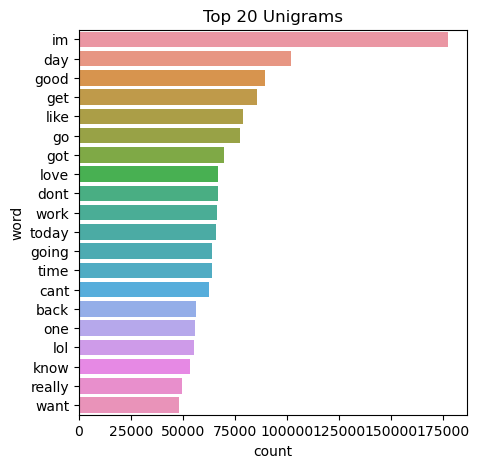

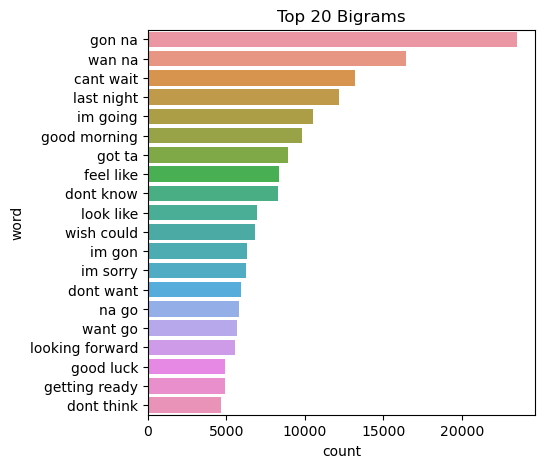

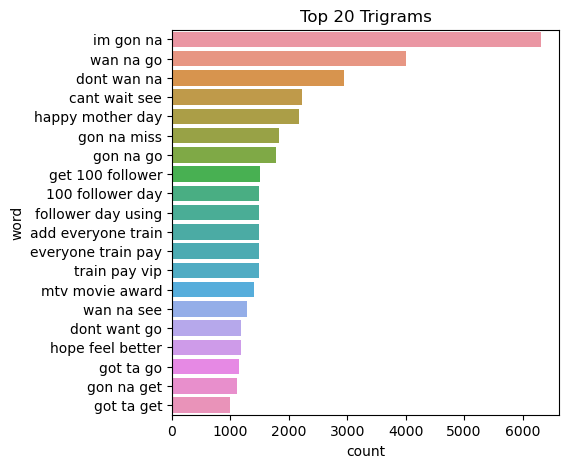

In [17]:
#NGRAM ANALYSIS
def plot_ngrams(corpus, ngram_range=(1, 1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = words_freq[:n]
    words_df = pd.DataFrame(words_freq, columns=['word', 'count'])
    return words_df

unigrams = plot_ngrams(df['processed_text'], ngram_range=(1, 1), n=20)
bigrams = plot_ngrams(df['processed_text'], ngram_range=(2, 2), n=20)
trigrams = plot_ngrams(df['processed_text'], ngram_range=(3, 3), n=20)

plt.figure(figsize=(5,5))
sns.barplot(x='count', y='word', data=unigrams)
plt.title('Top 20 Unigrams')
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(x='count', y='word', data=bigrams)
plt.title('Top 20 Bigrams')
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(x='count', y='word', data=trigrams)
plt.title('Top 20 Trigrams')
plt.show()


In [19]:
#text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)  # Reduce max_features
X = tfidf.fit_transform(df['processed_text'])  # This creates a sparse matrix
y = df['target']


Confusion Matrix:
 [[114542  44952]
 [ 35532 124974]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74    159494
           4       0.74      0.78      0.76    160506

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



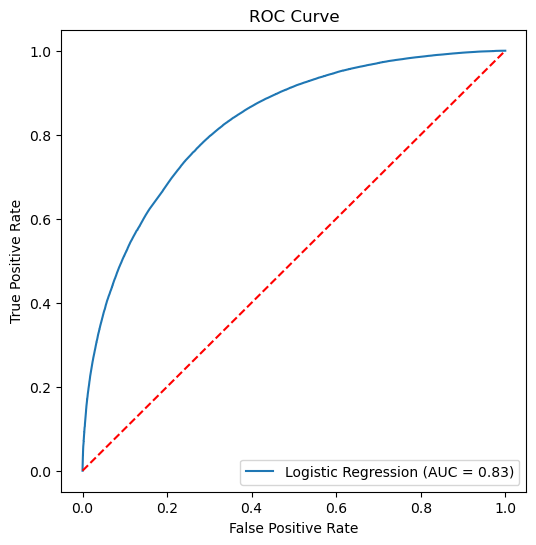

In [21]:
# Train-test split with original labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix & Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC Curve with pos_label specified
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=4)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
